**2025 PODS CAPSTONE PROJECT: ASSESSING PROFESSOR EFFECTIVENESS**

**AUTHOR: TANVI PATEL**

**Preprocessing Steps:**

In [198]:
# important libraries 
import random 
import numpy as np
import pandas as pd

# seed random genrator with my n number 1593692
N_num = 15956392
random.seed(N_num)
np.random.seed(N_num)

# load data 
rmp_n = pd.read_csv('/Users/tanvipatel/Desktop/rmpCapstoneNum.csv')
rmp_q= pd.read_csv('/Users/tanvipatel/Desktop/rmpCapstoneQual.csv')

# display the first few rows of the dataset
rmp_n.head(), rmp_q.head(), rmp_n.shape, rmp_q.shape

#remove first row on both datasets because it's null 
rmp_n = rmp_n.drop(index=0).reset_index(drop=True)
rmp_q = rmp_q.drop(index=0).reset_index(drop=True)

# rename columns on both datasets
rmp_n.columns = ["Average Ratings", "Average Difficulty", "Number of Ratings", "Pepper",
    "Retake Percent", "Online Ratings", "Male", "Female"]

rmp_q.columns = ["Major", "University", "State"]

# find median of number of ratings
median_rating = rmp_n['Number of Ratings'].median()
print("median rating is ", median_rating)

# remove empty rows in key data
rmp_n = rmp_n.dropna(subset=['Average Ratings', 'Number of Ratings'])

# make threshold 5 ratings per professor since 3 (median) is quite low to improve realiabilty of ratings 
threshold = 5
rmp_n = rmp_n[rmp_n['Number of Ratings'] >= threshold]

# merge datasets
merged_df = rmp_n.merge(rmp_q, left_index=True, right_index=True)

# final check
print(merged_df.info())
print(merged_df.head())

median rating is  3.0
<class 'pandas.core.frame.DataFrame'>
Index: 25368 entries, 1 to 89889
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Average Ratings     25368 non-null  float64
 1   Average Difficulty  25368 non-null  float64
 2   Number of Ratings   25368 non-null  float64
 3   Pepper              25368 non-null  float64
 4   Retake Percent      12160 non-null  float64
 5   Online Ratings      25368 non-null  float64
 6   Male                25368 non-null  int64  
 7   Female              25368 non-null  int64  
 8   Major               25368 non-null  object 
 9   University          25368 non-null  object 
 10  State               25368 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB
None
    Average Ratings  Average Difficulty  Number of Ratings  Pepper  \
1               3.6                 3.5               10.0     1.0   
3               3.5           

**Question 1: Is there pro gender male bias?**

Median rating for male professors: 4.2
Median rating for female professors: 4.1


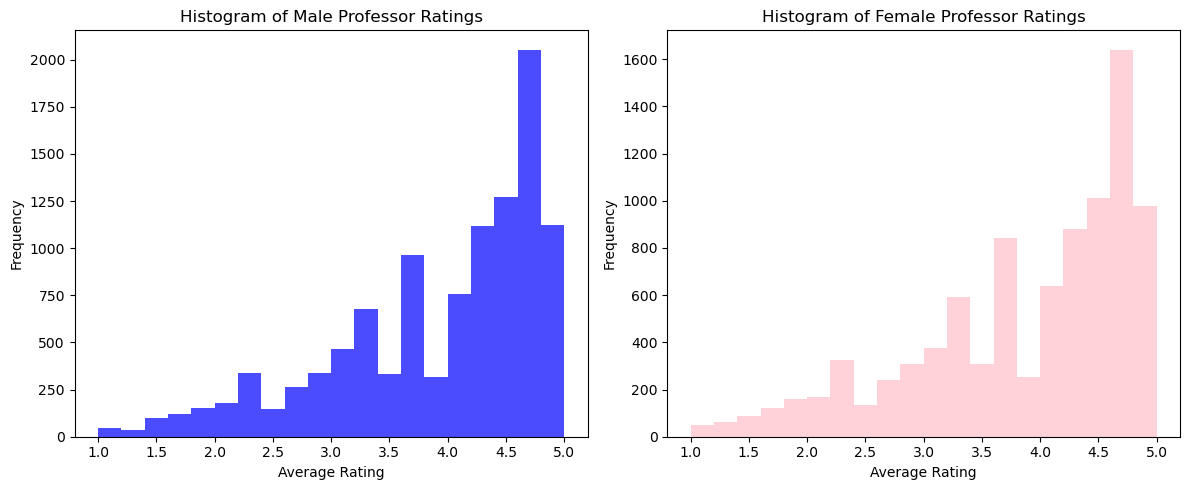

Mann-Whitney U statistic: 50901762.5
p-value: 0.0008387610375322855
Result: Statistically significant difference (p < 0.05)


/var/folders/lq/jv8rnrh178d_vqp64s6866zh0000gn/T/ipykernel_15505/2269760520.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ratings_df, x='Gender', y='Average Rating', palette='Set3')
/var/folders/lq/jv8rnrh178d_vqp64s6866zh0000gn/T/ipykernel_15505/2269760520.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=ratings_df, x='Gender', y='Average Rating', palette='Set3')


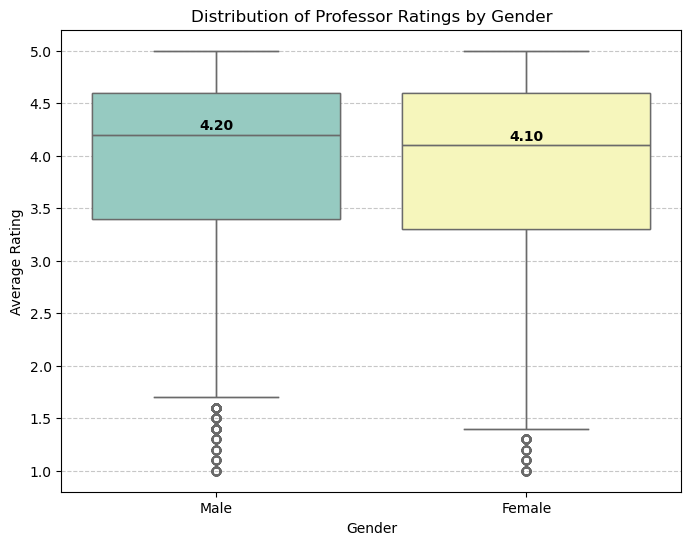

In [273]:

# seperate male and female ratings into two groups 
male_ratings = merged_df[merged_df['Male'] == 1]['Average Ratings']
female_ratings = merged_df[merged_df['Female'] == 1]['Average Ratings']

# calcualte medians for both 
male_median = round(male_ratings.median(), 2)
female_median = round(female_ratings.median(), 2)
print(f'Median rating for male professors: {male_median}')
print(f'Median rating for female professors: {female_median}')

# plot histogram of both data to see the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Male Ratings Histogram
plt.subplot(1, 2, 1)
plt.hist(male_ratings, bins=20, color='blue', alpha=0.7)
plt.title("Histogram of Male Professor Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")

# Female Ratings Histogram
plt.subplot(1, 2, 2)
plt.hist(female_ratings, bins=20, color='pink', alpha=0.7)
plt.title("Histogram of Female Professor Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# the histograms show a skewed distrubtion; proceeding with mann u whitney test
from scipy.stats import mannwhitneyu

# run the test
stat, p_value = mannwhitneyu(male_ratings, female_ratings, alternative='two-sided')

# print the results
print("Mann-Whitney U statistic:", stat)
print("p-value:", p_value)

# state statisical significance
if p_value < 0.05:
    print("Result: Statistically significant difference (p < 0.05)")
else:
    print("Result: No statistically significant difference (p ≥ 0.05)")
    
# box plot 
import seaborn as sns
import matplotlib.pyplot as plt

# prepare DataFrame for boxplot
ratings_df = pd.DataFrame({
    'Average Rating': pd.concat([male_ratings, female_ratings], ignore_index=True),
    'Gender': ['Male'] * len(male_ratings) + ['Female'] * len(female_ratings)
})

# plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=ratings_df, x='Gender', y='Average Rating', palette='Set3')
ax = sns.boxplot(data=ratings_df, x='Gender', y='Average Rating', palette='Set3')

# add median value labels to each box
ax.text(0, male_median + 0.05, f"{male_median:.2f}", ha='center', fontweight='bold')
ax.text(1, female_median + 0.05, f"{female_median:.2f}", ha='center', fontweight='bold')

plt.title("Distribution of Professor Ratings by Gender")
plt.ylabel("Average Rating")
plt.xlabel("Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**2. Is there an effect of experience on the quality of teaching?**

Correlation Between Number of Ratings (Experience) and Average Rating is: 0.06
                            OLS Regression Results                            
Dep. Variable:        Average Ratings   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     85.13
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           3.00e-20
Time:                        15:10:26   Log-Likelihood:                -34568.
No. Observations:               25368   AIC:                         6.914e+04
Df Residuals:                   25366   BIC:                         6.916e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

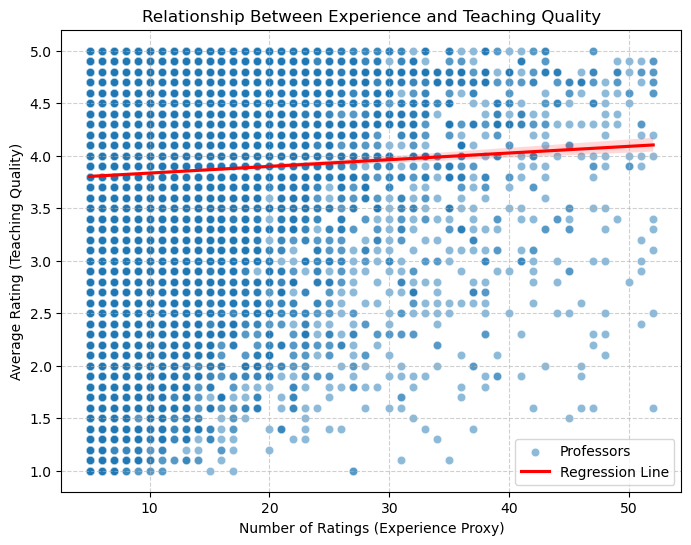

In [200]:
# correlation analysis between experience and average ratings
# number of ratings = experience 
# average rating = quality of teaching 

import statsmodels.api as sm

# cap the number of ratings at the 99th percentile 
cap = merged_df["Number of Ratings"].quantile(0.99)
new_cap_data = merged_df[merged_df["Number of Ratings"] <= cap]

# calculate the correlation between the number of ratings and the average ratings
cor = merged_df["Number of Ratings"].corr(merged_df["Average Ratings"])
print(f'Correlation Between Number of Ratings (Experience) and Average Rating is: {round(cor,2)}')

X= merged_df["Number of Ratings"]
Y= merged_df["Average Ratings"]

X= sm.add_constant(X)

model= sm.OLS(Y, X).fit()
model_sum = model.summary()
print(model_sum)

p = model.pvalues["Number of Ratings"]

# state statistical significance
if p < 0.005:
    print("There is statistical significance.")
else:
    print("This is not statistically significant.")

# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Number of Ratings", y="Average Ratings", data=new_cap_data, alpha=0.5, label="Professors")

# regression line
sns.regplot(x="Number of Ratings", y="Average Ratings", data=new_cap_data,
            scatter=False, color="red", label="Regression Line")

plt.title("Relationship Between Experience and Teaching Quality")
plt.xlabel("Number of Ratings (Experience Proxy)")
plt.ylabel("Average Rating (Teaching Quality)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


**3. What is the relationship between average rating and average difficulty?**

Spearman Correlation: -0.6
p-value: 0.0
Statistically significant relationship.


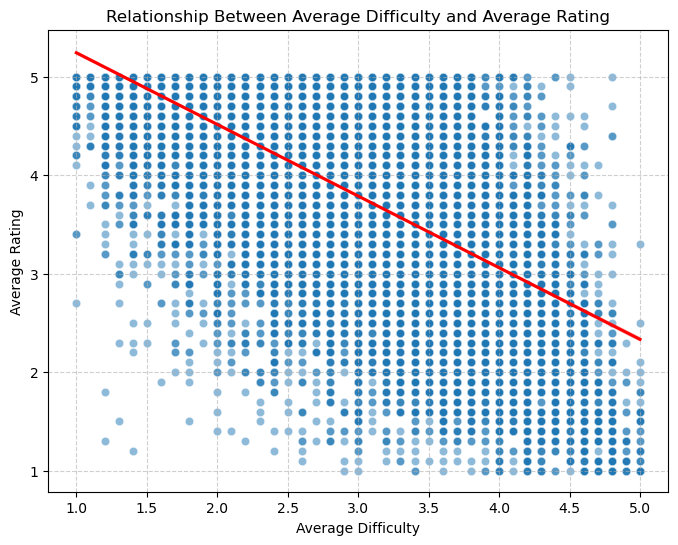

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# conduct spearman correlation analysis 
corr, p_val = spearmanr(merged_df['Average Difficulty'], merged_df['Average Ratings'])
print(f"Spearman Correlation: {round(corr, 2)}")
print(f"p-value: {p_val}")

# state statisical significance
if p_val < 0.05:
    print("Statistically significant relationship.")
else:
    print("No statistically significant relationship.")

# scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Difficulty', y='Average Ratings', data=merged_df, alpha=0.5)
sns.regplot(x='Average Difficulty', y='Average Ratings', data=merged_df, scatter=False, color='red')
plt.title("Relationship Between Average Difficulty and Average Rating")
plt.xlabel("Average Difficulty")
plt.ylabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**4. Do professors who teach a lot of classes in the online modality receive higher or lower ratings than those who don’t?**

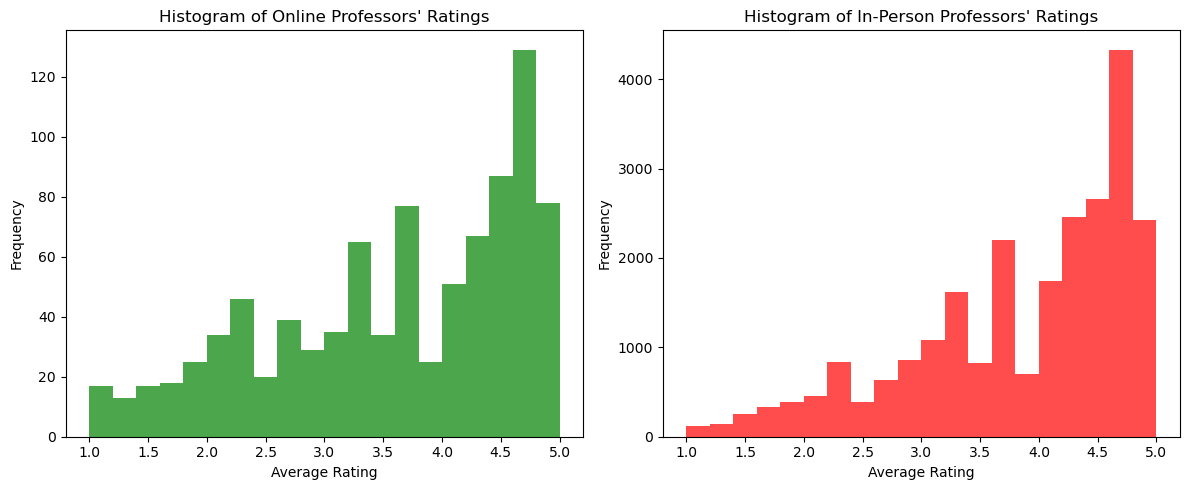

Median Rating (Many Online Classes): 3.8
Median Rating (Few/No Online Classes): 4.1


<Figure size 640x480 with 0 Axes>

Mann-Whitney U Statistic: 9589124.0
P-value: 0.0
There is a statistically significant difference in ratings between the two groups.


/var/folders/lq/jv8rnrh178d_vqp64s6866zh0000gn/T/ipykernel_15505/3614351447.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=filtered_df, x='Group', y='Average Ratings', palette='Set3')


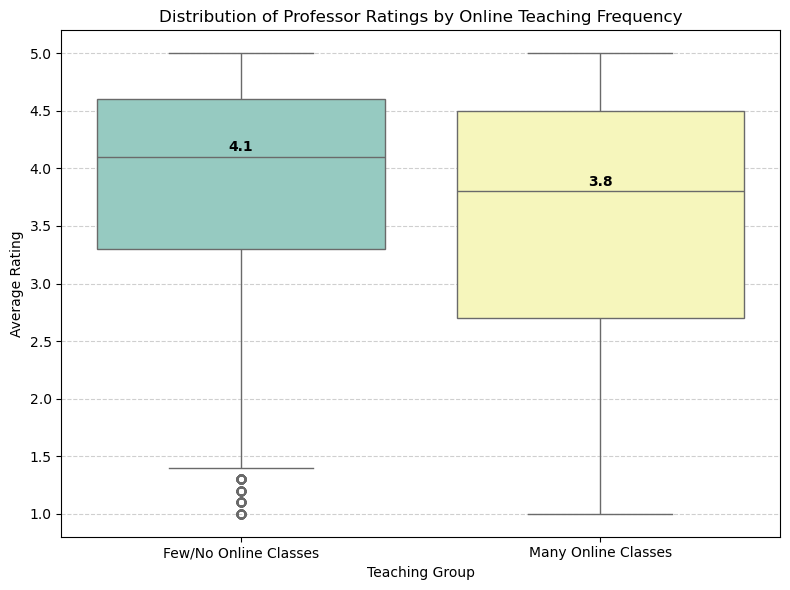

In [271]:

import scipy.stats as stats

# Define the threshold
threshold = 0.5

# Step 1: Drop missing values from relevant columns
filtered_df = merged_df.dropna(subset=['Online Ratings', 'Number of Ratings', 'Average Ratings'])

# Step 2: Calculate the proportion of online classes
filtered_df['Proportion Online'] = filtered_df['Online Ratings'] / filtered_df['Number of Ratings']

# Step 3: Create two groups based on the threshold
online_group = filtered_df[filtered_df['Proportion Online'] > threshold]
inperson_group = filtered_df[filtered_df['Proportion Online'] <= threshold]

# Step 4: Plot histograms of the 'Average Ratings' column
plt.figure(figsize=(12, 5))

# Online Professors Histogram
plt.subplot(1, 2, 1)
plt.hist(online_group['Average Ratings'], bins=20, color='green', alpha=0.7)
plt.title("Histogram of Online Professors' Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")

# In-Person Professors Histogram
plt.subplot(1, 2, 2)
plt.hist(inperson_group['Average Ratings'], bins=20, color='red', alpha=0.7)
plt.title("Histogram of In-Person Professors' Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Step 5: Calculate median ratings
online_med = online_group['Average Ratings'].median()
inperson_med = inperson_group['Average Ratings'].median()

print(f"Median Rating (Many Online Classes): {round(online_med, 2)}")
print(f"Median Rating (Few/No Online Classes): {round(inperson_med, 2)}")

med_online = round(online_group['Average Ratings'].median(), 2)
med_inperson = round(inperson_group['Average Ratings'].median(), 2)
ax.text(1, med_online + 0.05, f"{med_online}", ha='center', fontweight='bold')
ax.text(0, med_inperson + 0.05, f"{med_inperson}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Mann-Whitney U Test
stat, p = mannwhitneyu(
    online_group['Average Ratings'],
    inperson_group['Average Ratings'],
    alternative='two-sided'
)

print("Mann-Whitney U Statistic:", round(stat, 2))
print("P-value:", round(p, 4))

if p < 0.05:
    print("There is a statistically significant difference in ratings between the two groups.")
else:
    print("There is no statistically significant difference in ratings between the two groups.")

# prepare data for bloxplot
filtered_df['Group'] = filtered_df['Proportion Online'].apply(
    lambda x: 'Many Online Classes' if x > threshold else 'Few/No Online Classes'
)

# create boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=filtered_df, x='Group', y='Average Ratings', palette='Set3')
plt.title('Distribution of Professor Ratings by Online Teaching Frequency')
plt.xlabel('Teaching Group')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.6)


online_median = round(online_group['Average Ratings'].median(), 2)
inperson_median = round(inperson_group['Average Ratings'].median(), 2)

ax.text(0, inperson_median + 0.05, f"{inperson_median}", ha='center', fontweight='bold')
ax.text(1, online_median + 0.05, f"{online_median}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


**5. What is the relationship between the average rating and the proportion of people who would take the class the professor teaches again?**

Correlation between Average Rating and Retake Percent: 0.88
                            OLS Regression Results                            
Dep. Variable:        Average Ratings   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 4.188e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:31:33   Log-Likelihood:                -6153.7
No. Observations:               12160   AIC:                         1.231e+04
Df Residuals:                   12158   BIC:                         1.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

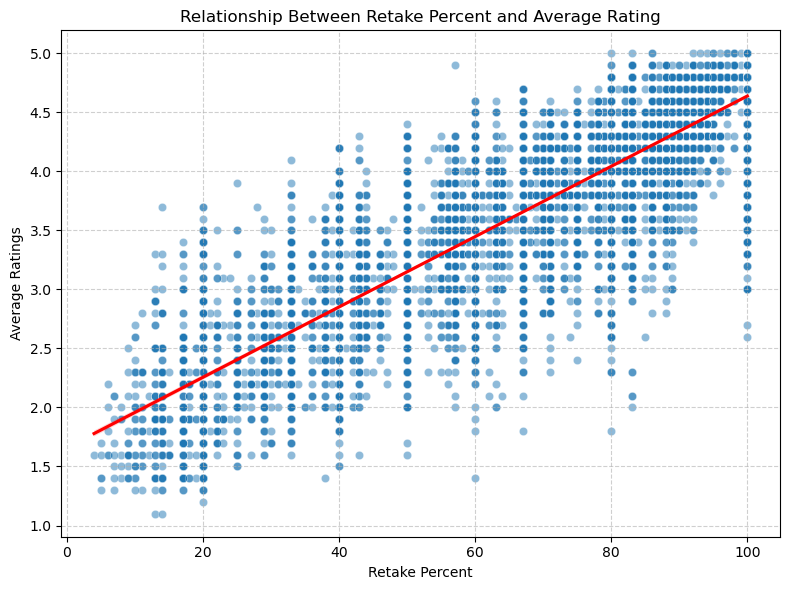

In [234]:
# drop missing values
rating_re = merged_df.dropna(subset=['Average Ratings', 'Retake Percent'])

# calculate the correlation
correlation = rating_re['Average Ratings'].corr(rating_re['Retake Percent'])
print(f"Correlation between Average Rating and Retake Percent: {round(correlation, 2)}")

# set up variables for regression
X = rating_re['Retake Percent']
y = rating_re['Average Ratings']

# add constant term for intercept
X = sm.add_constant(X)

# fit OLS regression model
model = sm.OLS(y, X).fit()

# print regression summary
print(model.summary())

# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rating_retake, x='Retake Percent', y='Average Ratings', alpha=0.5)
sns.regplot(data=rating_retake, x='Retake Percent', y='Average Ratings', scatter=False, color='red')

plt.title('Relationship Between Retake Percent and Average Rating')
plt.xlabel('Retake Percent')
plt.ylabel('Average Ratings')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**6. Do professors who are “hot” receive higher ratings than those who are not?**

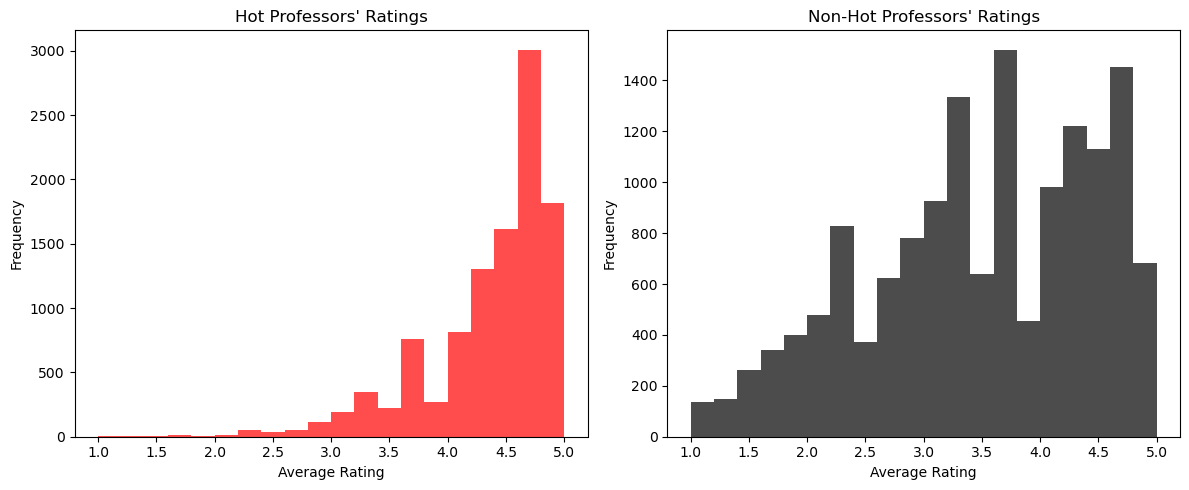

Median Rating (Hot Professors): 4.5
Median Rating (Not-Hot Professors): 3.6

Mann-Whitney U Test Results:
Statistic: 121910581.5
P-value: 0.0
Statistically significant difference in ratings between hot and not-hot professors.


/var/folders/lq/jv8rnrh178d_vqp64s6866zh0000gn/T/ipykernel_15505/2027654726.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=ratings_df, x='Group', y='Average Ratings', palette='pastel')


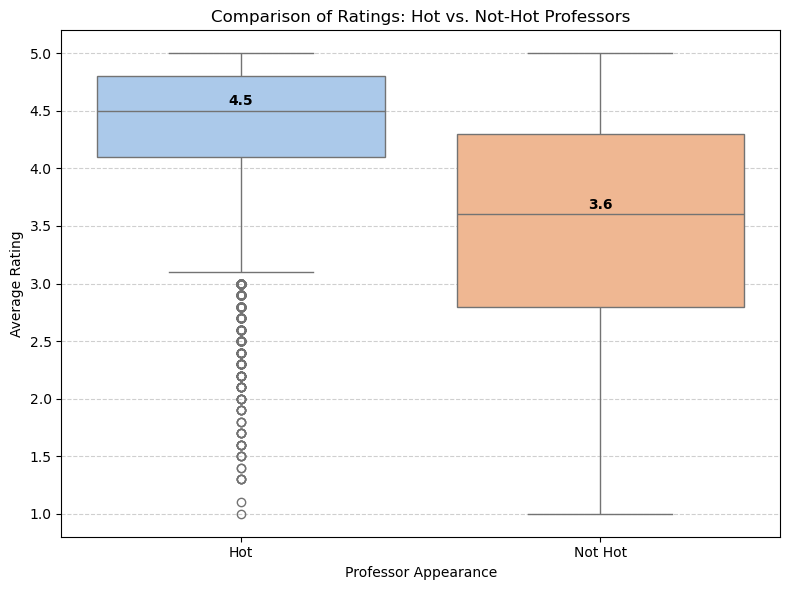

In [282]:

# separate groups based on 'Pepper'
hot = merged_df.loc[merged_df['Pepper'] == 1, 'Average Ratings']
not_hot = merged_df.loc[merged_df['Pepper'] == 0, 'Average Ratings']

# Step 2: Plot histograms to check distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(hot, bins=20, color='red', alpha=0.7)
plt.title("Hot Professors' Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(not_hot, bins=20, color='black', alpha=0.7)
plt.title("Non-Hot Professors' Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Step 3: Calculate medians
hot_med = round(hot.median(), 2)
not_hot_med = round(not_hot.median(), 2)

print(f"Median Rating (Hot Professors): {hot_med}")
print(f"Median Rating (Not-Hot Professors): {not_hot_med}")

# Step 4: Mann-Whitney U Test (since distributions are non-normal)
stat, p = mannwhitneyu(hot, not_hot, alternative='two-sided')

print("\nMann-Whitney U Test Results:")
print(f"Statistic: {round(stat, 2)}")
print(f"P-value: {round(p, 4)}")

if p < 0.05:
    print("Statistically significant difference in ratings between hot and not-hot professors.")
else:
    print("No statistically significant difference in ratings.")

# Step 5: Combine data for boxplot
ratings_df = merged_df.dropna(subset=['Pepper', 'Average Ratings']).copy()
ratings_df['Group'] = ratings_df['Pepper'].apply(lambda x: 'Hot' if x == 1 else 'Not Hot')

# Step 6: Boxplot with medians
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=ratings_df, x='Group', y='Average Ratings', palette='pastel')
plt.title('Comparison of Ratings: Hot vs. Not-Hot Professors')
plt.xlabel('Professor Appearance')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add median labels
ax.text(0, hot_med + 0.05, f"{hot_med}", ha='center', fontweight='bold')
ax.text(1, not_hot_med + 0.05, f"{not_hot_med}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**7. Build a regression model predicting average rating from difficulty (only).**

                            OLS Regression Results                            
Dep. Variable:        Average Ratings   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:40:48   Log-Likelihood:                -28481.
No. Observations:               25368   AIC:                         5.697e+04
Df Residuals:                   25366   BIC:                         5.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.9692      0

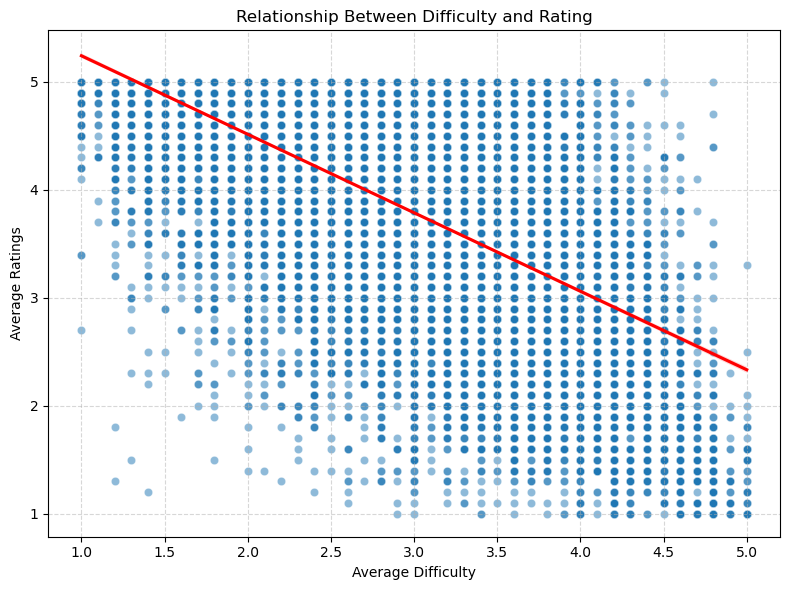

In [247]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# prepare the data
df_diff = merged_df.dropna(subset=['Average Ratings', 'Average Difficulty'])

X = df_diff['Average Difficulty']
y = df_diff['Average Ratings']

# add constant term for intercept
X = sm.add_constant(X)

# fit the OLS model
model = sm.OLS(y, X).fit()

# make predictions
y_pred = model.predict(X)

# calculate R-squared and RMSE
r_squared = model.rsquared
rmse = np.sqrt(mean_squared_error(y, y_pred))

# print model summary and performance
print(model.summary())
print("\nModel Performance:")
print(f"R-squared: {round(r_squared, 2)}")
print(f"RMSE: {round(rmse, 2)}")

# plot scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_diff, x='Average Difficulty', y='Average Ratings', alpha=0.5)
sns.regplot(data=df_diff, x='Average Difficulty', y='Average Ratings', scatter=False, color='red')

plt.title('Regression: Difficulty and Rating')
plt.xlabel('Average Difficulty')
plt.ylabel('Average Ratings')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**8. Build a regression model predicting average rating from all available factors.**

                            OLS Regression Results                            
Dep. Variable:        Average Ratings   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     8028.
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:06:45   Log-Likelihood:                -5483.0
No. Observations:               12160   AIC:                         1.098e+04
Df Residuals:                   12153   BIC:                         1.103e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4652      0

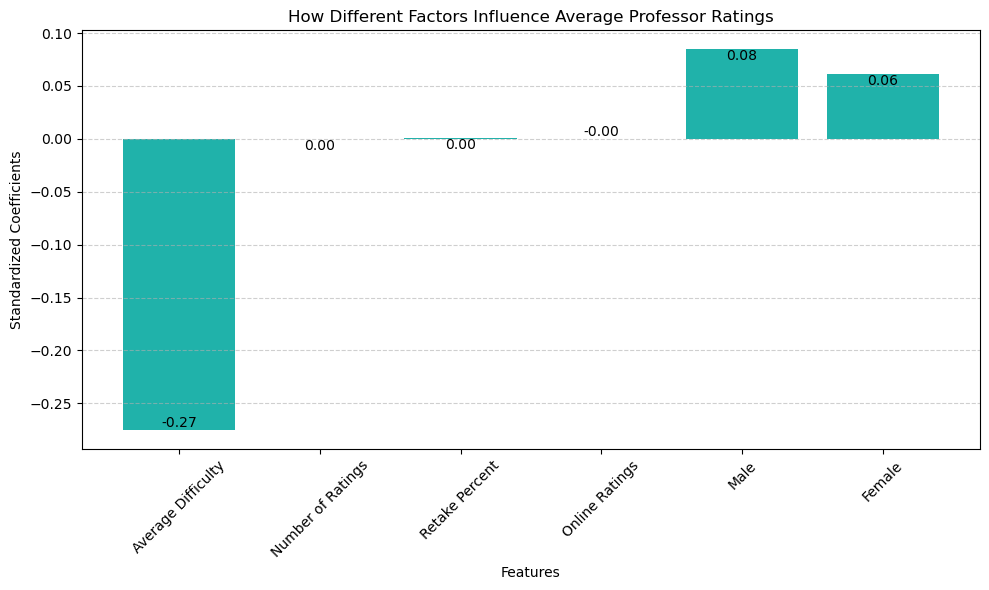

In [288]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 1: Drop missing values from relevant columns
required_cols = ["Average Ratings", "Average Difficulty", "Number of Ratings", 
                 "Retake Percent", "Online Ratings", "Male", "Female"]
clean_df = merged_df.dropna(subset=required_cols)

# Step 2: Set up features (X) and target (y)
X = clean_df[["Average Difficulty", "Number of Ratings", "Retake Percent", "Online Ratings", "Male", "Female"]]
y = clean_df["Average Ratings"]

# Step 3: Add constant (intercept) to features
X = sm.add_constant(X)

# Step 4: Fit linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Step 5: Evaluate model
r_squared = model.rsquared
rmse = np.sqrt(mean_squared_error(y, predictions))

# Step 6: Calculate Variance Inflation Factors (VIF)
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 7: Print model summary and metrics
print(model.summary())
print("\nModel Performance:")
print(f"R-squared: {r_squared:.3f}")
print(f"RMSE: {rmse:.3f}")

print("\nVariance Inflation Factors (VIF):")
print(vif_df)

# Step 8: Compare with 'Difficulty-Only' model
print("\nComparison with 'Difficulty-Only' Model:")
print(f"R-squared Improvement: {r_squared - r_sq:.3f}")
print(f"RMSE Improvement: {rmse - rmse:.3f}")

# Step 9: Standardize coefficients (excluding intercept)
coefs = model.params[1:]  # exclude intercept
feature_names = X.columns[1:]
standardized_coefs = coefs / np.std(X.iloc[:, 1:], axis=0)

# Step 10: Plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, standardized_coefs, color="lightseagreen")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom" if height < 0 else "top",
        fontsize=10
    )

plt.title("How Different Factors Influence Average Professor Ratings")
plt.xlabel("Features")
plt.ylabel("Standardized Coefficients")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


**9. Build a classification model that predicts whether a professor receives a “pepper” from average
rating only.**

Area Under ROC Curve: 0.78


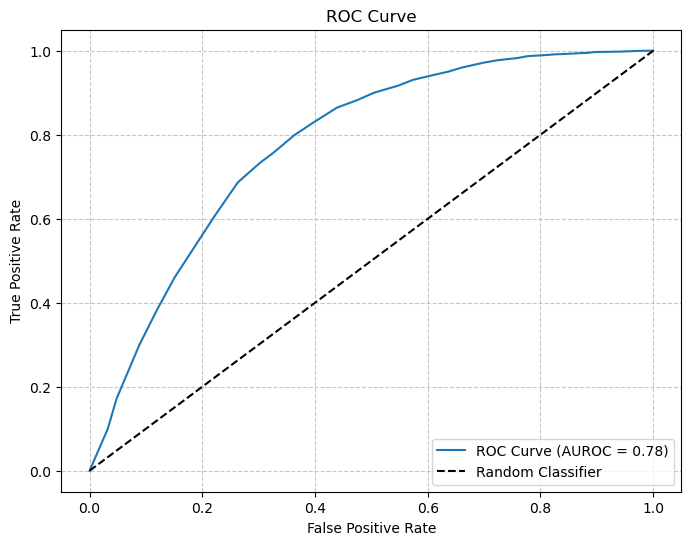

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69      2942
         1.0       0.69      0.80      0.74      2942

    accuracy                           0.72      5884
   macro avg       0.72      0.72      0.72      5884
weighted avg       0.72      0.72      0.72      5884



In [290]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.utils import resample

# Step 1: Preprocessing
classification_df = merged_df.dropna(subset=['Average Ratings', 'Pepper'])

# Step 2: Handle class imbalance
pepper_1 = classification_df[classification_df['Pepper'] == 1]
pepper_0 = classification_df[classification_df['Pepper'] == 0]

pepper_1_upsampled = resample(pepper_1,
                              replace=True,
                              n_samples=len(pepper_0),
                              random_state=42)

# Combine balanced dataset
balanced_df = pd.concat([pepper_0, pepper_1_upsampled])

# Step 3: Define features and target
X = balanced_df[['Average Ratings']]
y = balanced_df['Pepper']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Step 5: Build and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 7: Evaluate with AUROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Area Under ROC Curve: {round(roc_auc, 2)}')

# Step 8: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Step 9: Predict labels and print classification report
y_pred_labels = model.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_pred_labels))

**10. Build a classification model that predicts whether a professor receives a “pepper” from all available
factors.** 

AU(ROC) for all factors model: 0.79


/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


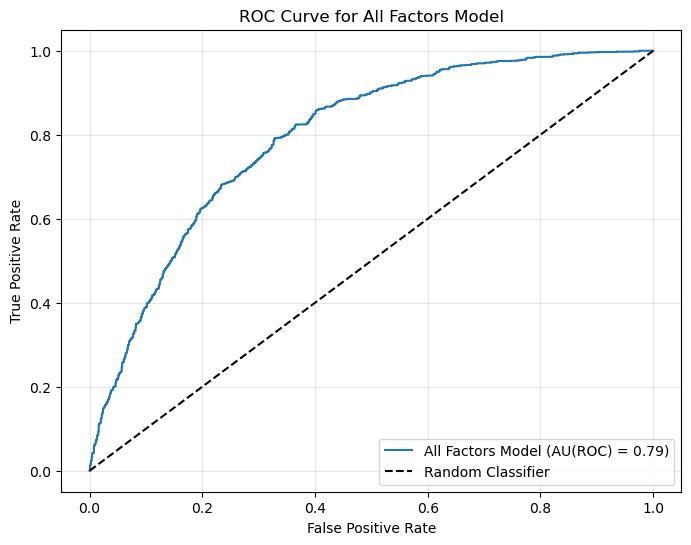


Classification Report for All Factors Model:
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71      1299
         1.0       0.70      0.79      0.74      1299

    accuracy                           0.73      2598
   macro avg       0.73      0.73      0.73      2598
weighted avg       0.73      0.73      0.73      2598


Comparison with 'Average Rating Only' Model:
AU(ROC) Improvement: 0.017


In [298]:

# Step 1: Drop rows with missing values in key columns
clean_df = merged_df.dropna(subset=["Average Ratings", "Average Difficulty", "Number of Ratings", 
                                    "Retake Percent", "Online Ratings", "Male", "Female", "Pepper"])

# Step 2: Split into pepper = 1 and pepper = 0 groups
pepper_yes = clean_df[clean_df['Pepper'] == 1]
pepper_no = clean_df[clean_df['Pepper'] == 0]

# Step 3: Upsample the pepper_yes group to balance the dataset
pepper_yes_upsampled = resample(pepper_yes, replace=True, 
                                n_samples=len(pepper_no), random_state=42)

# Step 4: Combine into a balanced dataset
balanced_data = pd.concat([pepper_no, pepper_yes_upsampled])

# Step 5: Define features (X) and target (y)
feature_cols = ["Average Ratings", "Average Difficulty", "Number of Ratings", 
                "Retake Percent", "Online Ratings", "Male", "Female"]

X = balanced_data[feature_cols]
y = balanced_data["Pepper"]

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Step 7: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Predict probabilities and calculate AUROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AU(ROC) for all factors model: {round(roc_auc, 2)}")

# Step 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"All Factors Model (AU(ROC) = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Factors Model")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Step 10: Classification Report
y_pred = model.predict(X_test)
print("\nClassification Report for All Factors Model:")
print(classification_report(y_test, y_pred))

# Step 11: Compare to Average Rating Only Model
# (Assuming roc_auc_rating already exists from your 'rating only' model)
print("\nComparison with 'Average Rating Only' Model:")
print(f"AU(ROC) Improvement: {roc_auc - roc_auc_rating:.3f}")

**Extra Credit: Which universities have the highest pepper rate for professors (the hottest professors)?**

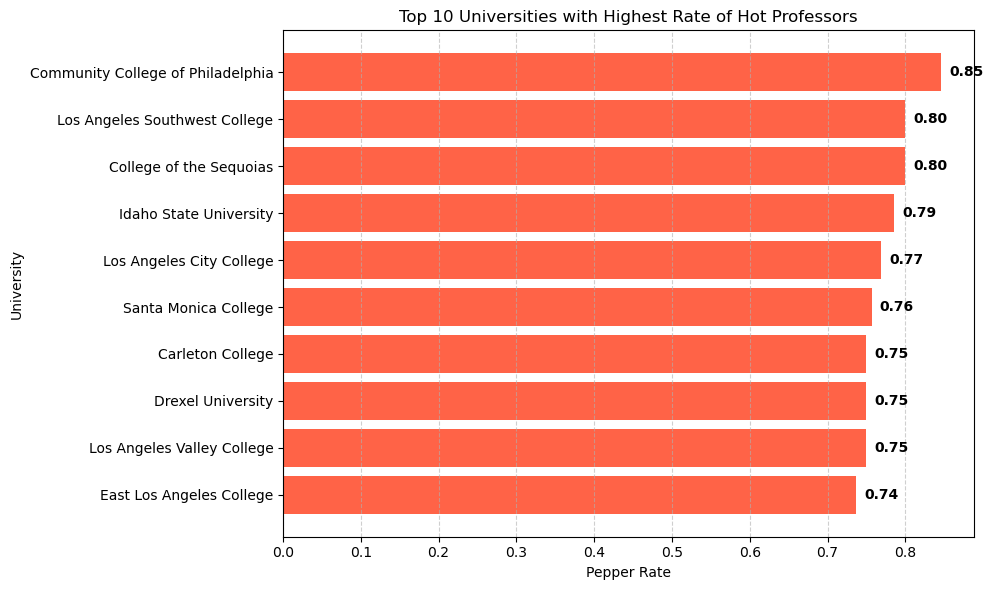

In [304]:
# Step 2: Filter out rows with missing University or Pepper info
df_filtered = merged_df.dropna(subset=['University', 'Pepper'])

# Step 3: Group by university
pepper_counts = df_filtered.groupby('University')['Pepper'].agg(
    total_professors='count',
    hot_professors='sum'
).reset_index()

# Step 4: Calculate pepper rate
pepper_counts['Pepper Rate'] = pepper_counts['hot_professors'] / pepper_counts['total_professors']

# Step 5: Filter universities with enough data (optional but recommended, e.g., at least 10 profs reviewed)
pepper_counts_filtered = pepper_counts[pepper_counts['total_professors'] >= 10]

# Step 6: Sort by highest pepper rate
top_universities = pepper_counts_filtered.sort_values(by='Pepper Rate', ascending=False).head(10)

# Step 7: Plot
plt.figure(figsize=(10, 6))
plt.barh(top_universities['University'], top_universities['Pepper Rate'], color='tomato')
plt.xlabel('Pepper Rate')
plt.ylabel('University')
plt.title('Top 10 Universities with Highest Rate of Hot Professors')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add labels
for index, value in enumerate(top_universities['Pepper Rate']):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()